## Q1. Write a Python code to implement the KNN classifier algorithm on load_iris dataset in sklearn.datasets.

In [139]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

In [140]:
dataset = load_iris()

In [141]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [142]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [71]:
#dataset.data

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X = dataset.data
y = dataset.target

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [146]:
from sklearn.neighbors import KNeighborsClassifier

In [147]:
classifier=KNeighborsClassifier(n_neighbors=5,algorithm='auto')
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [148]:
y_pred = classifier.predict(X_test)
#y_pred1 = log_reg.predict(x_test)

C:\Users\Sadha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [149]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [150]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
#print(roc_auc_score(y_pred,classifier.predict_proba(X),multi_class='ovr'))
 #roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')

[[19  0  0]
 [ 0 15  1]
 [ 0  0 15]]
0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## Hyperparameter tunning of KNNclassifier

In [151]:
grid_params = { 'n_neighbors' : [5,7,9,11,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)#-1 means use all processor
# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [55]:
# find the best score
g_res.best_score_

0.9497920380273323

In [56]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}

In [58]:
knn_best = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
knn_best.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', weights='distance')

In [59]:
knn_best.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', weights='distance')

In [60]:
# get a prediction
y_hat = knn_best.predict(X_train)
y_knn = knn_best.predict(X_test)

### model Evaluation

In [63]:
print('Training set accuracy: ',accuracy_score(y_train, y_hat))
print('Test set accuracy: ',accuracy_score(y_test, y_knn))

Training set accuracy:  1.0
Test set accuracy:  0.98


In [64]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_knn))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [69]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_best, X, y, cv =10)

In [70]:
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.9666666666666668


As we see, we have obtained a very high model accuracy of 0.97. It is possible that the accuracy may be increased further by using more hyperparameters or with a different model.

## Q2. Write a Python code to implement the KNN regressor algorithm on load_boston dataset in sklearn.datasets.

In [155]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

In [156]:
#dataset = load_boston()
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [157]:
raw_df.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8


In [160]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [161]:
dataset1 = load_boston()
dataset1.DESCR

C:\Users\Sadha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [162]:
X = data
y = target

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [168]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [165]:
classifier_reg=KNeighborsRegressor()
classifier_reg.fit(X_train,y_train)

KNeighborsRegressor()

In [169]:
y_pred = classifier_reg.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
#y_pred1 = log_reg.predict(x_test)

32.17596886227545
5.6723865226441905
0.5748334691810936
4.148862275449102


In [170]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.model_selection import GridSearchCV

In [171]:
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model =KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 5.6723865226441905
RMSE value for k=  2 is: 5.6723865226441905
RMSE value for k=  3 is: 5.6723865226441905
RMSE value for k=  4 is: 5.6723865226441905
RMSE value for k=  5 is: 5.6723865226441905
RMSE value for k=  6 is: 5.6723865226441905
RMSE value for k=  7 is: 5.6723865226441905
RMSE value for k=  8 is: 5.6723865226441905
RMSE value for k=  9 is: 5.6723865226441905
RMSE value for k=  10 is: 5.6723865226441905


<AxesSubplot:>

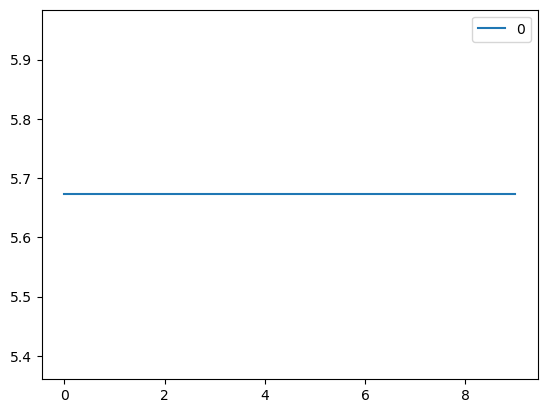

In [114]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

## Hyperparameter Tunning

In [173]:
grid_params = { 'n_neighbors' : [5,7,9,11,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs_reg = GridSearchCV(KNeighborsRegressor(), grid_params, verbose = 1, cv=3, n_jobs = -1)#-1 means use all processor
# fit the model on our train set
g_reg = gs_reg.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [174]:
g_reg.best_score_

0.543085782079651

In [175]:
g_reg.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

#### Fit with best param

In [183]:
knn_reg_best = KNeighborsRegressor(n_neighbors = 5,metric='manhattan',weights='distance')

In [184]:
knn_reg_best = knn_reg_best.fit(X_train, y_train)

In [185]:
y_pred = classifier_reg.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
#y_pred1 = log_reg.predict(x_test)

32.17596886227545
5.6723865226441905
0.5748334691810936
4.148862275449102


## Q3. Write a Python code snippet to find the optimal value of K for the KNN classifier algorithm using cross-validation on load_iris dataset in sklearn.datasets.

In [208]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

In [199]:
dataset = load_iris()

In [209]:
X = dataset.data
y = dataset.target

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

In [211]:
knn_best1 = KNeighborsClassifier()

In [212]:
knn_best1.fit(X_train, y_train)

KNeighborsClassifier()

In [213]:
from sklearn.model_selection import cross_val_score

In [219]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [220]:
scores1 = cross_val_score(knn_best1, X, y, cv =10)

C:\Users\Sadha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Sadha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [221]:
print(np.mean(scores1))

0.9666666666666668


## Q4. Implement the KNN regressor algorithm with feature scaling on load_boston dataset in sklearn.datasets.

In [274]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [275]:
#dataset = load_boston()
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [276]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [277]:
X = data
y = target

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [279]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [280]:
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [281]:
classifier_reg_sc=KNeighborsRegressor()
classifier_reg_sc.fit(X_train,y_train)

KNeighborsRegressor()

In [282]:
y_pred = classifier_reg_sc.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
#y_pred1 = log_reg.predict(x_test)

19.066237125748508
4.3664902525653835
0.7480627256564338
2.714491017964072


## Q5. Write a Python code snippet to implement the KNN classifier algorithm with weighted voting on load_iris dataset in sklearn.datasets.

In [261]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
dataset = load_iris()

In [262]:
X = dataset.data
y = dataset.target

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

In [266]:
knn = KNeighborsClassifier(weights= 'uniform')

In [267]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [268]:
y_pred = knn.predict(X_test)

C:\Users\Sadha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [269]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[16  0  0]
 [ 0 14  0]
 [ 0  0 15]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [270]:
knn_1 = KNeighborsClassifier(weights= 'distance')

In [271]:
knn_1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [272]:
y_pred = knn.predict(X_test)

C:\Users\Sadha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [273]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[16  0  0]
 [ 0 14  0]
 [ 0  0 15]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Q6. Implement a function to standardise the features before applying KNN classifier.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

def knn_with_standardization(X_train, y_train, X_test, n_neighbors):
    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Fit KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_test)
    
    return y_pred

## Q7. Write a Python function to calculate the euclidean distance between two points.

In [284]:
import math

def euclidean_distance(p1, p2):
    distance = 0
    for i in range(len(p1)):
        distance += (p1[i] - p2[i])**2
    return math.sqrt(distance)

In [285]:
p1 = (1, 2, 3)
p2 = (4, 5, 6)
euclidean_distance(p1, p2)

5.196152422706632

## Q8. Write a Python function to calculate the manhattan distance between two points.

In [287]:
def manhattan_distance(p1, p2):
    distance = 0
    for i in range(len(p1)):
        distance += abs(p1[i] - p2[i])
    return distance

In [288]:
p1 = (1, 2, 3)
p2 = (4, 5, 6)
distance = manhattan_distance(p1, p2)
print(distance)

9
